# Project Title

## Introduction

In this section, briefly describe:
- **Goal of the analysis** — What are you trying to achieve?
- **Key question(s)** — The main problem(s) or topic(s) you aim to answer.
- **Context or background** — Why this question matters, and any relevant domain info.

## Table of Contents
1. [Overview](#Introduction)

2. [Setup & Scope](#setup--scope)

3. [Data Exploration](#data)

4. [Analysis](#Analysis)

5. [Conclusions](#Conclusions)

## Setup & Scope 

This analysis is based on a dataset provided by Codecademy, inspired by information from the U.S. National Parks Service. It focuses on endangered species observed across various national parks and aims to uncover patterns in species vulnerability and distribution.

The following key questions guide the scope of this report:
- Which biological categories (e.g., mammals, birds, plants) are most affected by endangerment?
- What are the top ten most critically endangered species?
- Are certain national parks home to a higher concentration of endangered species?
- How are endangered species distributed across parks and categories?
- How does conservation status vary across different species categories?
- Which endangered species have the highest number of recorded observations?

## Python Libraries

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

## Data Exploration

### Observations
- The observations fiie has the following columns:  
* Scientifc name - the scientific name of the animal/plant
* park name - name of the park 
* observations - number of observations of the creature/plant in the park, with values between 109 and 563 

In [2]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85



- species_info: a file with data about each creature:

 * Category - the category that the animal/plant belongs to - (Bird/Mammal/Plant/etc)
 * Scientific name - the scientific name of the animal
 * Common names - the common names for the animal/plant 
 * Conservation status - the status of conservation - can be Endangered, Threatend,   


In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN



By examining the species_info file we can notice that we have several scientific name duplicates, for example canis lupus appears three times with different converstaion status, Vireo solitarius appears twice, one with two common names. 
Also, the conversation status has nan values for not endagered species, so thee is a need to replace it with a non endangered string instead. 
By using dtypes, info and describe we can confirm that except the observations which is an int, all the other variables are objects, matching the categorical variables in all those categories. 


## Cleaning and formatting the Data:

- observations: going over the data found several identical observations, meaning same scientific name, same park, same number of observations, since there are not timestamps or any other discerning metric, i treated them as duplicates and removed them. No nan values where found. 

- species_info: Here its more complex. There are several rows with the same category and scientific name, but can have different or more than one common name and different conservation status. Since common names is not an analyzable parameter, i ingored it and decided to keep the last row that appears in the csv, where the reasoning is that this is the latest updated entry to the file, which lacks any kind of timestamps to confirm or deny. 

The Conservation Status column contains 5,633 missing values (NaNs), indicating that no data is available for the conservation status of these species. I replaced these missing entries with the label "No Intervention" to maintain consistency in the dataset. However, this substitution limits our ability to accurately interpret or infer the true conservation status of these species, especially given the small sample size relative to the broader population. The absence of conservation status for certain species is often not missing at random, as it reflects underlying biases in research attention and resource allocation.


- for observation amount based analysis i add a column of each secientific name sum of total observations in the observations.csv file. 

In [10]:
## Check for missing values
observations.isnull().sum()
species.isnull().sum()

# check for duplicates in the 'observations' DataFrame
print(observations.duplicated(keep=False).sum())

# drop the duplicated rows
observations.drop_duplicates(inplace=True)

# fill NaN values in the 'conservation_status' column with 'Unknown'
species['conservation_status'] = species['conservation_status'].fillna('Unknown') 

# check for duplicates in the 'species_info' DataFrame - where category and scientific_name are the same
dup_mask = species[species.duplicated(subset=["category", "scientific_name"], keep=False)].sort_values(by=["scientific_name"])
species = species.drop_duplicates(subset=["category", "scientific_name"], keep='last')

# Count the number of observations for each species and add it to the species DataFrame 
obs_counts = observations.groupby('scientific_name')['observations'].sum()
species['observations'] = species['scientific_name'].map(obs_counts)


0
            category       scientific_name  \
5600  Vascular Plant        Holcus lanatus   
4475          Mammal     Castor canadensis   
4799  Vascular Plant  Hypochaeris radicata   
4451          Mammal         Puma concolor   
4459          Mammal         Procyon lotor   
...              ...                   ...   
4601       Amphibian          Rana sierrae   
570             Fish       Noturus baileyi   
276             Bird   Vermivora bachmanii   
9             Mammal           Canis rufus   
173             Bird        Grus americana   

                                           common_names conservation_status  \
5600     Common Velvetgrass, Velvetgrass, Yorkshire Fog     No Intervention   
4475                                             Beaver     No Intervention   
4799  Common Cat's-Ear, False Dandelion, Frogbit, Go...     No Intervention   
4451                                      Mountain Lion     No Intervention   
4459                                            Ra

## Data Exploartion

- observations : there are 23281 rows in the observations file, with 5541 unique species and 4 parks. 
The most observerd species is the Holcus lanatus with 1780 observations across all parks. 
The least observed species is Grus americana with only 131 observations across all parks. 
The observetions per park are distributes equaly, each park is about 25% of all the sample size. 
The observations per species are also distributed equally, each one gets about 0.01% of the sample size. 

In [68]:
print(f"Total observations {observations.shape[0]}")
print(f"Most observed Species: {observations.groupby('scientific_name')['observations'].sum().idxmax()} with {observations.groupby('scientific_name')['observations'].sum().max()} observations in total")
print(f"Least observerd Species: {observations.groupby('scientific_name')['observations'].sum().idxmin()} with {observations.groupby('scientific_name')['observations'].sum().min()} observations in total")
print(f"Total number of unique species: {observations.scientific_name.nunique()}")
print(f"Total number of parks: {observations.park_name.nunique()}")
print(f"park distribution:\n{observations.park_name.value_counts(normalize=True)*100}")
print(f"park distribution:\n{observations.scientific_name.value_counts(normalize=True).sort_index()*100}")

Total observations 23281
Most observed Species: Holcus lanatus with 1780 observations in total
Least observerd Species: Grus americana with 131 observations in total
Total number of unique species: 5541
Total number of parks: 4
park distribution:
park_name
Bryce National Park                    25.011812
Yosemite National Park                 25.003222
Yellowstone National Park              24.994631
Great Smoky Mountains National Park    24.990335
Name: proportion, dtype: float64
park distribution:
scientific_name
Abies bifolia                          0.017181
Abies concolor                         0.017181
Abies fraseri                          0.017181
Abietinella abietina                   0.017181
Abronia ammophila                      0.017181
                                         ...   
Zonotrichia leucophrys gambelii        0.017181
Zonotrichia leucophrys oriantha        0.017181
Zonotrichia querula                    0.017181
Zygodon viridissimus                   0.017181

- species info :
Just like in observations, species info also has 5541 different species, 7 types of species, and 5 possible conversation status

By examining the categories we can see that vascular plant makes the majority with 76.9 of all the data, where all the other categories have a single digit percentage of all the data, with fish, amphibian and reptile have a one two percentage of it. (maybe add theories why is that, locations, researcher bias, etc)

By examining the conversation stauts we can see that 96.7 is classfied as unknown, which might point to an sampling mistake or MAR or something. 

In [59]:
print(f"number of Species {species.shape[0]}")
print(f"types of Species: {species.category.nunique()}")
print(f"types of Species: {species.conservation_status.unique()}")
print(species.category.value_counts(normalize=True)*100)
print(species.conservation_status.value_counts(normalize=True)*100)

number of Species 5541
types of Species: 7
types of Species: ['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']
category
Vascular Plant       76.917524
Bird                  8.807075
Nonvascular Plant     6.009746
Mammal                3.176322
Fish                  2.255910
Amphibian             1.425735
Reptile               1.407688
Name: proportion, dtype: float64
conservation_status
No Intervention       96.769536
Species of Concern     2.725140
Endangered             0.270709
Threatened             0.180473
In Recovery            0.054142
Name: proportion, dtype: float64


## Analysis
- Which biological categories (e.g., mammals, birds, plants) are most affected by endangerment? - mammals 

- What are the top ten most critically endangered species?

- Are certain national parks home to a higher concentration of endangered species?

- How are endangered species distributed across parks and categories?

From the species with endangered conservation status, mammals is the most enangered category. 

The top ten most endangered species in this data set are: 
- Canis lupus
- Etheostoma percnurum
- Geum radiatum,Myotis grisescens,
- Gymnogyps californianus
- Glaucomys sabrinus coloratus           
- Ovis canadensis sierrae           
- Picoides borealis           
- Chasmistes liorus           
- Myotis sodalis           




Endangered species by category:         category  count
3          Mammal      6
1            Bird      4
2            Fish      3
0       Amphibian      1
4  Vascular Plant      1

Top Ten most endangered species:                   scientific_name        category
4448                   Canis lupus          Mammal
540           Etheostoma percnurum            Fish
2497                 Geum radiatum  Vascular Plant
34               Myotis grisescens          Mammal
4505       Gymnogyps californianus            Bird
72    Glaucomys sabrinus coloratus          Mammal
4446       Ovis canadensis sierrae          Mammal
343              Picoides borealis            Bird
3275             Chasmistes liorus            Fish
39                  Myotis sodalis          Mammal

endangered_species_by_park:
               park_name   sum  percentage
2            Yellowstone  1228   43.888492
3               Yosemite   747   26.697641
0                  Bryce   489   17.476769
1  Great Smoky Mountains

C:\Users\Yoav\AppData\Local\Temp\ipykernel_22368\4261291128.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=endangered_species_by_park, x='park_name', y='sum', palette='viridis')


Text(0, 0.5, 'Total observations of Endangered Species')

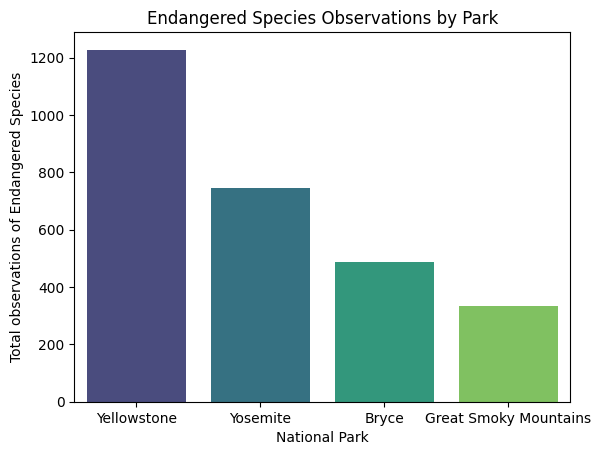

In [111]:
endangered_species = species[species['conservation_status'] == 'Endangered'].groupby('category').size().reset_index(name='count').sort_values(
    by='count', ascending=False)
    
print(f"Endangered species by category:{endangered_species}\n")

print(f"Top Ten most endangered species:{species[species[
    'conservation_status'] == 'Endangered'].nlargest(10, 'observations')[['scientific_name', 'category']]}\n")

endangered_species_by_park = observations[
    observations['scientific_name'].isin(
        species[species['conservation_status'] == 'Endangered']['scientific_name']
    )
].groupby('park_name')['observations'].sum().reset_index(name='sum').sort_values(by='sum', ascending=False)
endangered_species_by_park['park_name'] = endangered_species_by_park['park_name'].str.replace(' National Park', '', regex=False)
endangered_species_by_park['percentage'] = (endangered_species_by_park['sum'] * 100 / endangered_species_by_park['sum'].sum())
print(f"endangered_species_by_park:\n{endangered_species_by_park}\n")

sns.barplot(data=endangered_species_by_park, x='park_name', y='sum', palette='viridis')
plt.title('Endangered Species Observations by Park')
plt.xlabel('National Park')
plt.ylabel('Total observations of Endangered Species')

- How does conservation status vary across different species categories?
- Which endangered species have the highest number of recorded observations?


In this combined section, cover:
- **Approach** — The methods you used to explore and answer the question.
- **Exploratory findings** — Summary stats, plots, correlations.
- **Techniques applied** — Statistical tests, models, transformations, etc.
- **Results** — Tables, charts, metrics.
- **Interpretation** — What the results mean for the original question.

## Conclusions

Summarize:
- **Main takeaway** — The answer to your original question.
- **Implications** — How results could be used or acted upon.
- **Limitations** — Gaps in data, assumptions, or methods.
- **Next steps** — Further analyses, data to collect, or experiments to run.
